# Laboration 2 
Classify data as either Pikachu or Pichu. Run each cell in order, as they are dependent on the previous ones. 

<class 'list'>


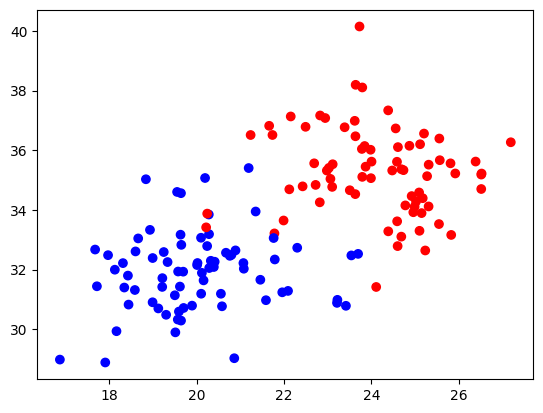

In [3]:
import matplotlib.pyplot as plt

file_path = "Data\\datapoints.txt"

import csv

# Define a list to store the data points as tuples (width, height, label)
data_points = []

with open(file_path, "r") as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        if len(row) == 3:
            width = float(row[0])
            height = float(row[1])
            label = int(row[2])
            data_points.append([width, height, label])

print(type(data_points[0]))

colors = ['red' if point[2] > 0 else 'blue' for point in data_points]
plt.scatter([x1[0] for x1 in data_points], [y[1] for y in data_points], c=colors)


## Read test data


In [10]:
test_cases = []

with open("Data\\testpoints.txt", "r") as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        if len(row) == 2:
            width = float(row[0][4:])
            height = float(row[1][:-1].strip())
            test_cases.append([width, height])

print(f"Test cases: {test_cases}")


Test cases: [[25.0, 32.0], [24.2, 31.5], [22.0, 34.0], [20.5, 34.0]]


## Beräkna avstånd mellan punkterna 

In [24]:
import math

def calc_distance(x1: float, y1: float, x2: float, y2: float):
    '''Calculates the distance between two points in a two-dimensional coordinate system.

    Args:
        x1 (float): The x-coordinate of the first point.
        y1 (float): The y-coordinate of the first point.
        x2 (float): The x-coordinate of the second point.
        y2 (float): The y-coordinate of the second point.

    Returns:
        float: The distance between the two points.
    '''
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def nearest_neighbor(test_point, data_points):
    ''' Classifies a test point based on the nearest data point.

    Args:
        test_point (tuple): The coordinates of the test point (x, y).
        data_points (list): List of data points, each represented as (x, y, classification).

    Returns:
        str: The classification result for the test point.
    '''
    smallest_distance = float('inf')

    for data_point in data_points:
        distance = calc_distance(data_point[0], data_point[1], test_point[0], test_point[1])
        if distance < smallest_distance:
            smallest_distance = distance
            closest_class = data_point[2]

    return "Pikachu" if closest_class == 1 else "Pichu"

classification_list = []

for i, test_case in enumerate(test_cases):
    classification_list.append(nearest_neighbor(test_case,data_points))
    print(f"Sample with (width, height): ({test_case[0]}, {test_case[1]}) classified as {classification_list[i]}")

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


## Uppgifter

Gör dessa uppgifter när du har klassificerat testdatan korrekt.

1.  Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.

In [56]:
# Task 1 
def input_test_case() -> tuple:
    """ Prompt the user to enter a test case in the format 'width, height'.

    Returns:
        tuple: A tuple containing the width and height entered by the user.
    """    
    input_incorrect=1
    while input_incorrect:
        entered_string = input("Enter test case in format 'width, height', e.g. '22.3, 30.0': ").strip()
        input_incorrect = 0
        try:
            entered_test_case = eval(entered_string)
        except:
            print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
            input_incorrect = 1
        try:
            if len(entered_test_case) != 2:
                print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
                input_incorrect = 1
        except:
            print("Please enter a valid test case in format 'width, height', e.g. '22.3, 30.0'.")
            input_incorrect = 1
        return entered_test_case

# Compare entered test case to the dataset using nearest neighbor
entered_test_case = input_test_case()
print(f"Sample with (width, height): ({entered_test_case[0]}, {entered_test_case[1]}) classified as {nearest_neighbor(entered_test_case, data_points)}")

Sample with (width, height): (25, 32) classified as Pikachu


2.  Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive klass går in i varandra. Nu ska du istället välja de tio närmaste punkterna till din testpunkt. Den klass testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna.

In [57]:
# Task 2

def k_nearest_neighbor(test_point, data_points, k: int):
    ''' Classifies a test point based on the k nearest data points.

    Args:
        test_point (tuple): The coordinates of the test point (x, y).
        data_points (list): List of data points, each represented as (x, y, classification).
        k (int): The number of closest neighbours to compare the test point to.

    Returns:
        str: The classification result for the test point, being the majority of the k closest neighbors.
    '''
    new_list = data_points.copy()

    for i, data_point in enumerate(new_list):
        new_list[i].append(calc_distance(data_point[0], data_point[1], test_point[0], test_point[1]))
    
    sorted_data = sorted(new_list, key=lambda x: x[-1])
    
    pikachu = 0
    pichu = 0

    for row in sorted_data[:k]:
        if row[2] == 1:
            pikachu +=1
        else:
            pichu +=1

    if pikachu > pichu:
        return "Pikachu"
    else:
        return "Pichu"

# Compare entered test case to the dataset using k nearest neighbor
# Choosing an odd k number as that guarantees a majority of cases one or the other 
entered_test_case = input_test_case()
print(f"Sample with (width, height): ({entered_test_case[0]}, {entered_test_case[1]}) classified as {k_nearest_neighbor(entered_test_case,data_points,11)}")


Sample with (width, height): (18, 31) classified as Pichu


## Bonusuppgifter (VG, frivilliga)
3. Dela in ursprungsdatan slumpmässigt så att:
* 100 är träningsdata (50 Pikachu, 50 Pichu)
* 50 är testdata (25 Pikachu, 25 Pichu)



4. Beräkna noggrannheten genom följande formel:

| Pikachu actual | Pichu actual |
| --- | --- |
| Pikachu predicted | TP | FP |
| Pichu predicted | FN | TN |

*Notera: För varje testpunkt beräknar vi distansen till träningspunkterna*

Upprepa uppgift 3 och 4 tio gånger, plotta en graf över accuracy och rapportera medelaccuracy